# Predicting Diabetes using Machine Learning

## AYSHA N

## Table of Content:

### 1. Problem statement
### 2.Objective
### 3.Data description
### 4.Importing libraries
### 5.EDA
### 6.Data preprocessing
### 7.Data visualisation
### 8.Feature scaling
### 9.Data splitting
### 10.Model selection
### 11.Feature selection
### 12.Model training & evaluation
### 13.Result
### 14.Model saving
### 16.Conclusion



## Problem statement:

### By using these patient record, we will try to build a machine learning model to accurately predict whether or not the patients in the data set have diabetes or not.

## Objective:

### The objective of the data set is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measuremet included in the dataset, several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are female atleast 21 years old. 

## Data description:

 ### The data set consist of several medical predictor variables and one target variable, Outcome. Predictor variables includes the number of pregnencies the patient has had, their BMI, insuline level, age and so on. 


 Columns:
    Pregnancies - number of times pregnent
    Glucose - plasma glucose concentrationa 2 hours in an oral glucose tolarence test
    Bloodpressure - diastolic bloodpressure(mm Hg)
    Skinthickness - Triceps skin fold thickness (mm)
    Insuline - 2 hour serum insuline (mu U /ml)
    BMI - Body mass index (weight in kg/height in m^2)
    DiabetesPedigreeFunction - Diabetes pedigree function
    Age - Age (years) 
    Outcome - Class variable (0 or 1) 
    

### importing libraries

In [151]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Data collection

In [152]:
df = pd.read_csv("Healthcare-Diabetes.csv")

### Exploratory Data Analysis (EDA)

In [153]:
df.head()

,Id,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1,6,148,72,35,0,33.6,0.627,50,1
1,2,1,85,66,29,0,26.6,0.351,31,0
2,3,8,183,64,0,0,23.3,0.672,32,1
3,4,1,89,66,23,94,28.1,0.167,21,0
4,5,0,137,40,35,168,43.1,2.288,33,1


In [154]:
df.tail()

,Id,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
2763,2764,2,75,64,24,55,29.7,0.370,33,0
2764,2765,8,179,72,42,130,32.7,0.719,36,1
2765,2766,6,85,78,0,0,31.2,0.382,42,0
2766,2767,0,129,110,46,130,67.1,0.319,26,1
2767,2768,2,81,72,15,76,30.1,0.547,25,0


In [155]:
df = df.drop(columns=["Id"])

In [156]:
# number of rows and columns
df.shape

(2768, 9)

In [157]:
# Total number of column in dataset
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [158]:
# number of numerical columns
num_cols = df.select_dtypes(include=("float","int")).columns
print(num_cols)

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')


In [159]:
# NUMBER OF CATEGORICAL COLUMN

cat_cols = df.select_dtypes(include='object').columns
print(cat_cols )

Index([], dtype='object')


#### therefore 9 out of 9 columns are numerical and ther is no categorical column

In [160]:
# Information about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2768 entries, 0 to 2767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               2768 non-null   int64  
 1   Glucose                   2768 non-null   int64  
 2   BloodPressure             2768 non-null   int64  
 3   SkinThickness             2768 non-null   int64  
 4   Insulin                   2768 non-null   int64  
 5   BMI                       2768 non-null   float64
 6   DiabetesPedigreeFunction  2768 non-null   float64
 7   Age                       2768 non-null   int64  
 8   Outcome                   2768 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 194.8 KB


In [161]:
# to know description about dataset 
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000
mean,3.742775,121.102601,69.134393,20.824422,80.127890,32.137392,0.471193,33.132225,0.343931
std,3.323801,32.036508,19.231438,16.059596,112.301933,8.076127,0.325669,11.777230,0.475104
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.244000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,37.000000,32.200000,0.375000,29.000000,0.000000
75%,6.000000,141.000000,80.000000,32.000000,130.000000,36.625000,0.624000,40.000000,1.000000
max,17.000000,199.000000,122.000000,110.000000,846.000000,80.600000,2.420000,81.000000,1.000000


In [162]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,2768.0,3.742775,3.323801,0.000,1.000,3.000,6.000,17.00
Glucose,2768.0,121.102601,32.036508,0.000,99.000,117.000,141.000,199.00
BloodPressure,2768.0,69.134393,19.231438,0.000,62.000,72.000,80.000,122.00
SkinThickness,2768.0,20.824422,16.059596,0.000,0.000,23.000,32.000,110.00
Insulin,2768.0,80.127890,112.301933,0.000,0.000,37.000,130.000,846.00
BMI,2768.0,32.137392,8.076127,0.000,27.300,32.200,36.625,80.60
DiabetesPedigreeFunction,2768.0,0.471193,0.325669,0.078,0.244,0.375,0.624,2.42
Age,2768.0,33.132225,11.777230,21.000,24.000,29.000,40.000,81.00
Outcome,2768.0,0.343931,0.475104,0.000,0.000,0.000,1.000,1.00


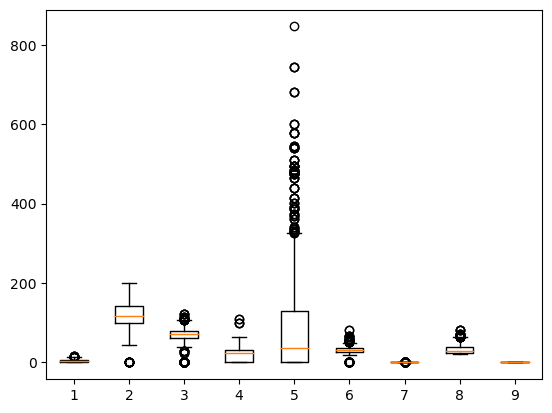

In [163]:
# detecting outliers
plt.boxplot(df)
plt.show()

#### therefore insuline has the most outliers. so we have to treat the outlier in insulin column



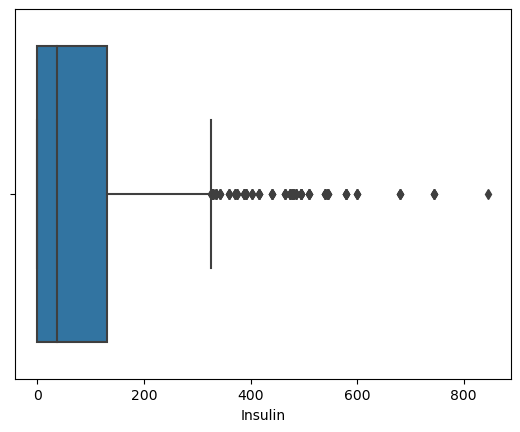

In [164]:
sns.boxplot(x=df["Insulin"]);

In [165]:
q1=df.Insulin.quantile(0.25)
q3=df.Insulin.quantile(0.75)
iqr=q3-q1
lower=q1-1.5*iqr
upper=q3+1.5*iqr
df.loc[df["Insulin"]>upper,"Insulin"]=upper



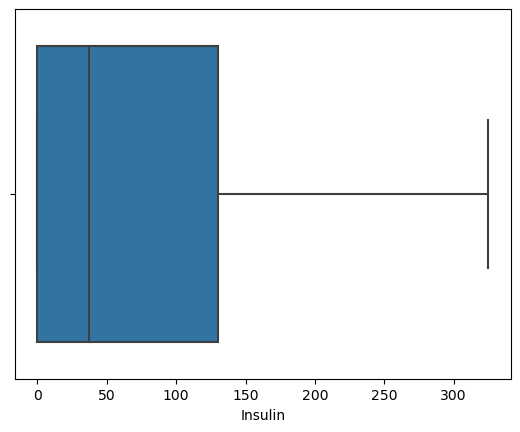

In [166]:
sns.boxplot(x=df["Insulin"]);

#### thus the outlier of insuline was treated

### Data Preprocessing

In [167]:
df.shape

(2768, 9)

In [168]:
# droping the duplicates
df=df.drop_duplicates()

In [169]:
df.shape

(778, 9)

#### before and after dropiing duplicates the shape remain constant , thus there is no duplicate values

In [170]:
# checking missing values 
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

#### so ther is no missing values in the dataset, yet independent features like skin thickness, insuline, blood pressure and glucose eacj have 0 values,which is practically impossible.it must be replaced by particular columns mean or median values.

In [171]:
# replacing 0 values with mean value
df['BloodPressure']=df['BloodPressure'].replace(0,df['BloodPressure'].mean())
df['SkinThickness']=df['SkinThickness'].replace(0,df['SkinThickness']. mean())
df['Insulin']=df['Insulin'].replace(0,df['Insulin'].mean())
df['BMI']=df['BMI'].replace(0,df['BMI'].mean())
df['Glucose']=df['Glucose'].replace(0,df['Glucose'].mean())


In [172]:
df.describe() 

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,778.000000,778.000000,778.000000,778.000000,778.000000,778.000000,778.000000,778.000000,778.000000
mean,3.821337,121.978144,72.167250,26.875116,110.772637,32.640540,0.471861,33.347044,0.349614
std,3.360794,30.467694,12.186693,10.109286,70.199948,7.254298,0.330180,11.789024,0.477155
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,100.000000,64.000000,20.763496,74.615681,27.600000,0.244000,24.000000,0.000000
50%,3.000000,118.000000,72.000000,23.000000,74.615681,32.250000,0.374500,29.000000,0.000000
75%,6.000000,141.000000,80.000000,32.000000,130.000000,36.775000,0.626750,41.000000,1.000000
max,17.000000,199.000000,122.000000,110.000000,325.000000,80.600000,2.420000,81.000000,1.000000


### Data visualisation

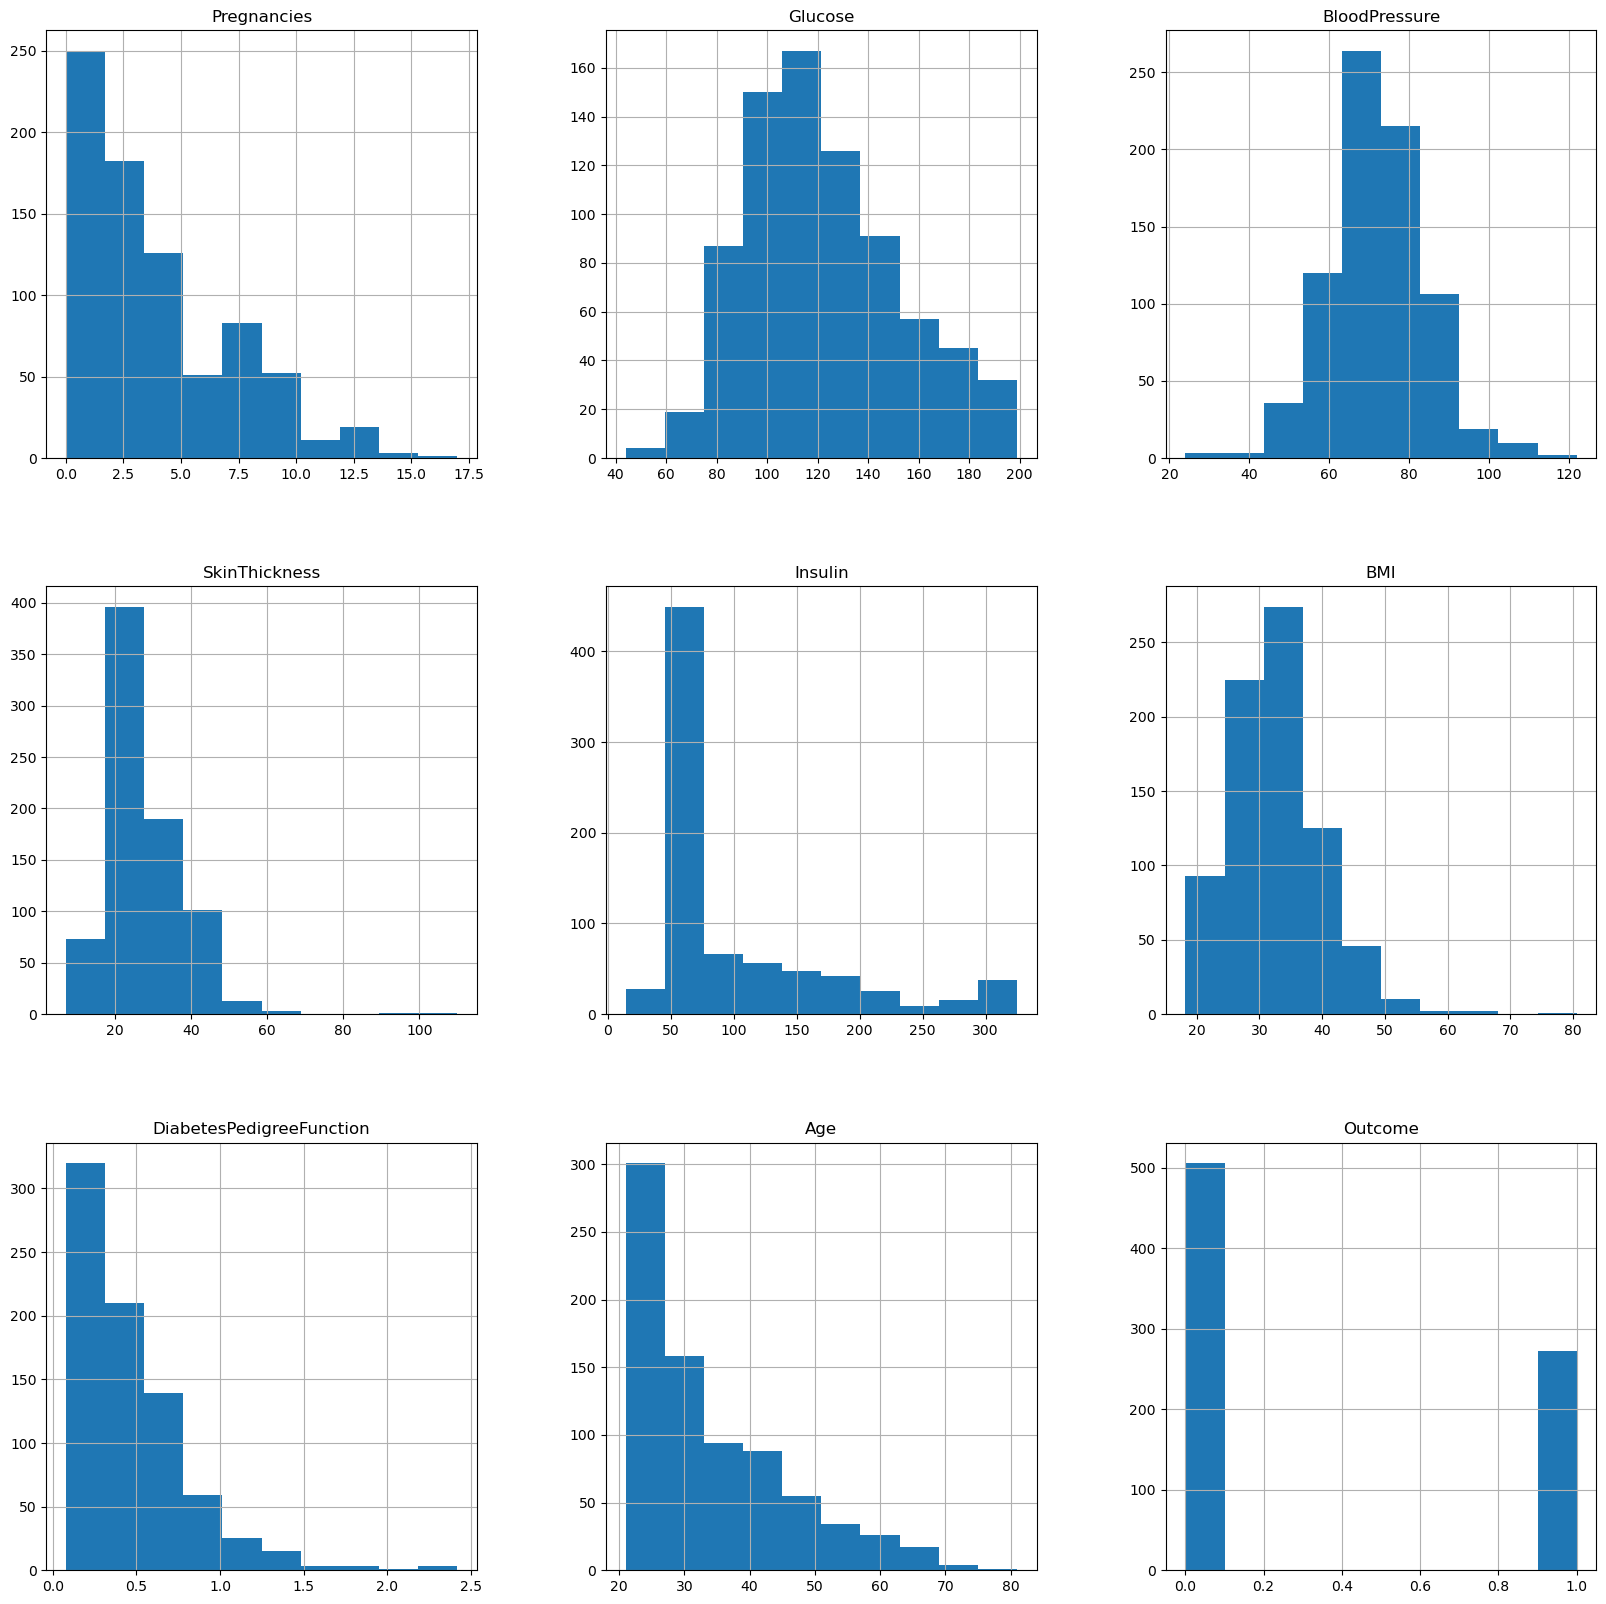

In [173]:
### plotting the histogram plot for data distibution
plot= df.hist(figsize = (20,20))

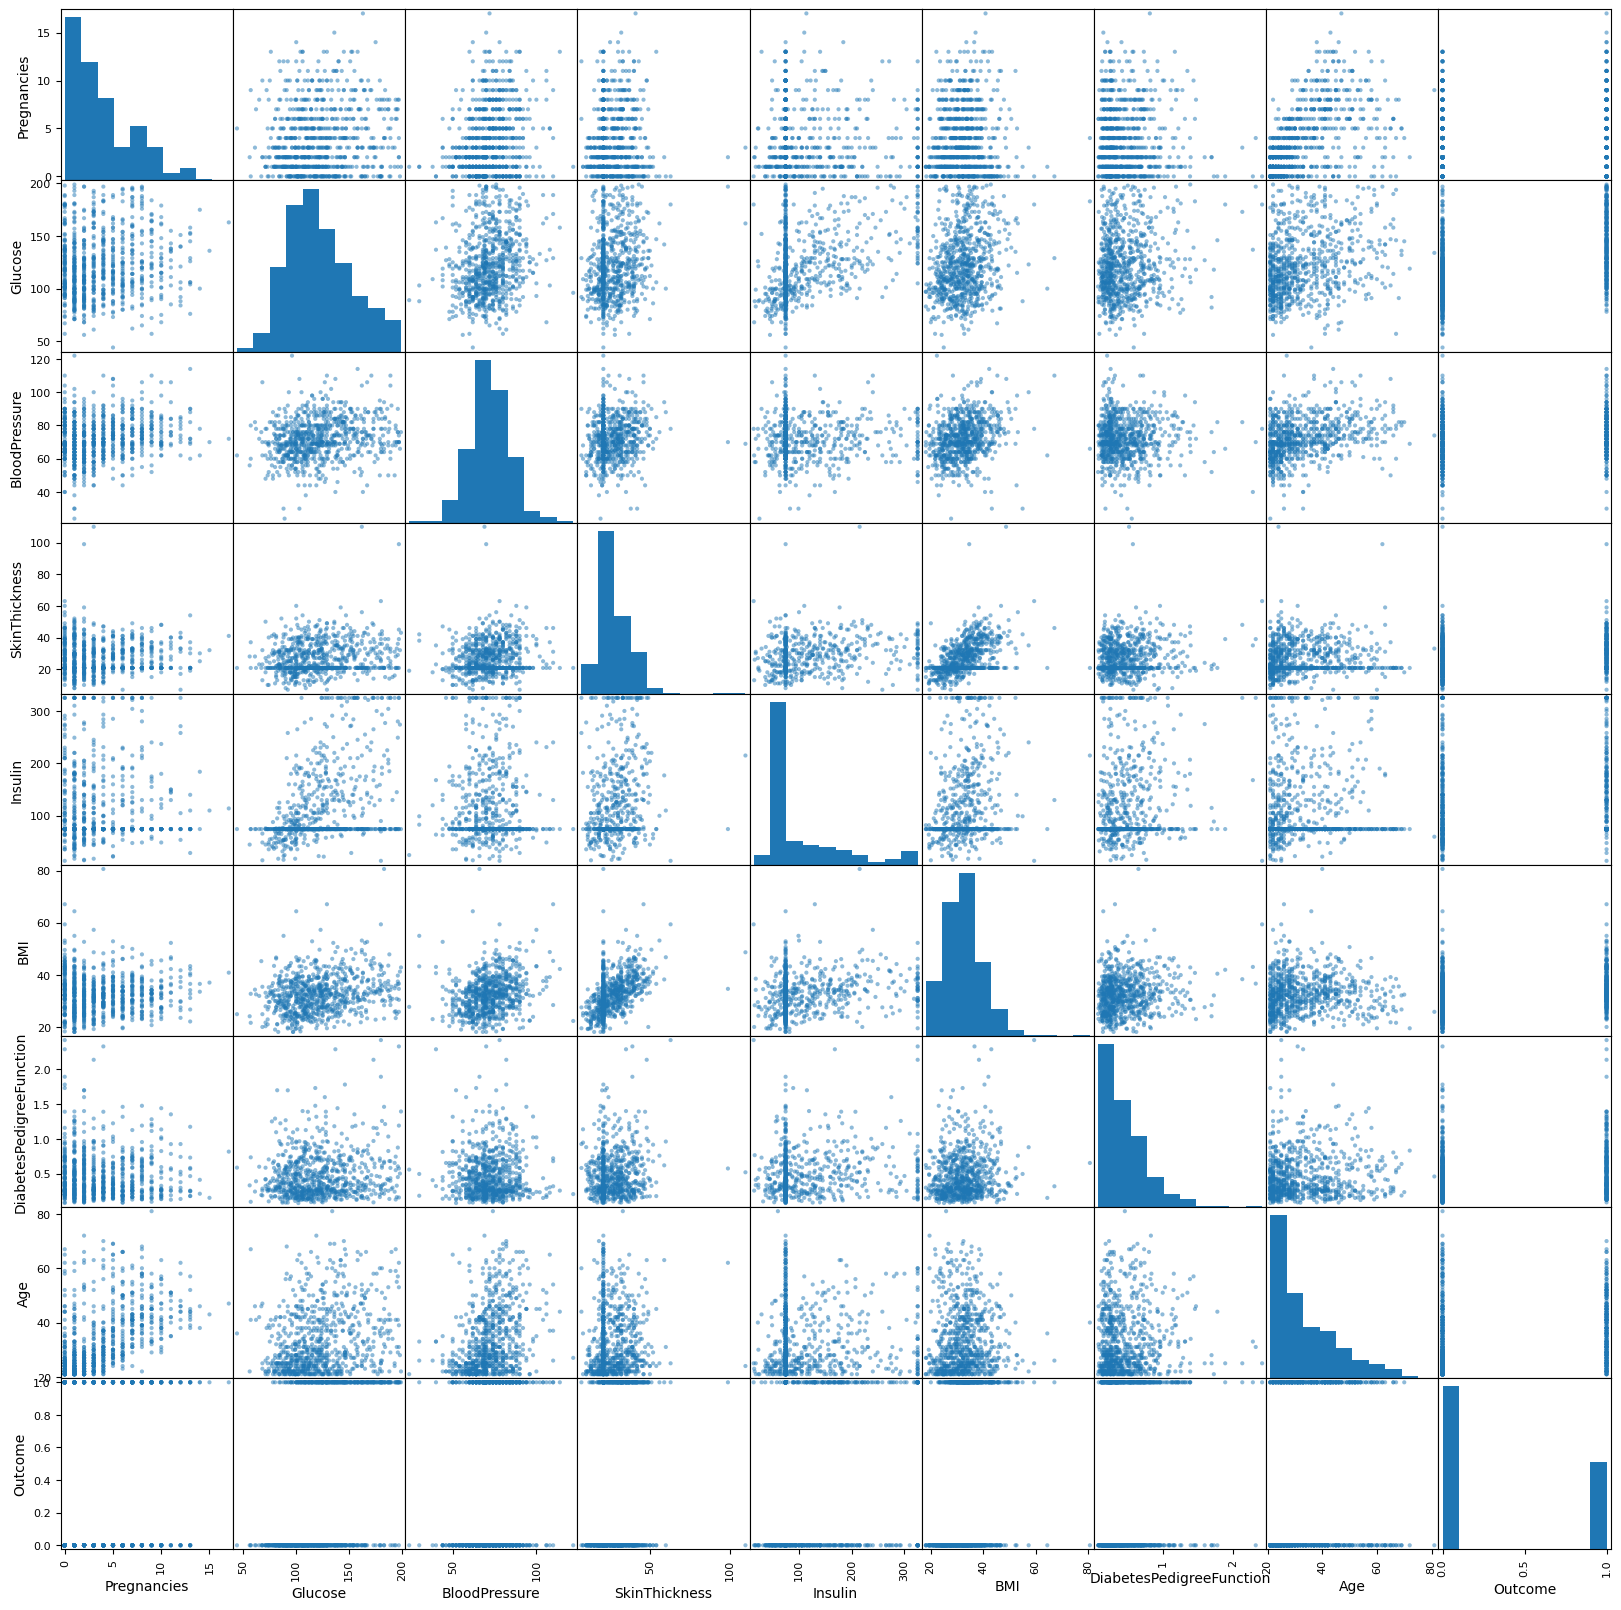

In [174]:
# scatter plot matrix
from pandas.plotting import scatter_matrix
scatter_matrix(df,figsize=(20,20));

### correlation between all the features

In [175]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.123185,0.213037,0.005495,-0.015704,0.013955,-0.034159,0.532993,0.220380
Glucose,0.123185,1.000000,0.207293,0.169398,0.403624,0.241528,0.137097,0.265411,0.484809
BloodPressure,0.213037,0.207293,1.000000,0.132354,0.014788,0.243231,0.003977,0.326307,0.170226
SkinThickness,0.005495,0.169398,0.132354,1.000000,0.272311,0.495543,0.151037,0.036059,0.169998
Insulin,-0.015704,0.403624,0.014788,0.272311,1.000000,0.206622,0.166577,0.029361,0.186273
BMI,0.013955,0.241528,0.243231,0.495543,0.206622,1.000000,0.140320,0.033458,0.277760
DiabetesPedigreeFunction,-0.034159,0.137097,0.003977,0.151037,0.166577,0.140320,1.000000,0.034839,0.172160
Age,0.532993,0.265411,0.326307,0.036059,0.029361,0.033458,0.034839,1.000000,0.244260
Outcome,0.220380,0.484809,0.170226,0.169998,0.186273,0.277760,0.172160,0.244260,1.000000


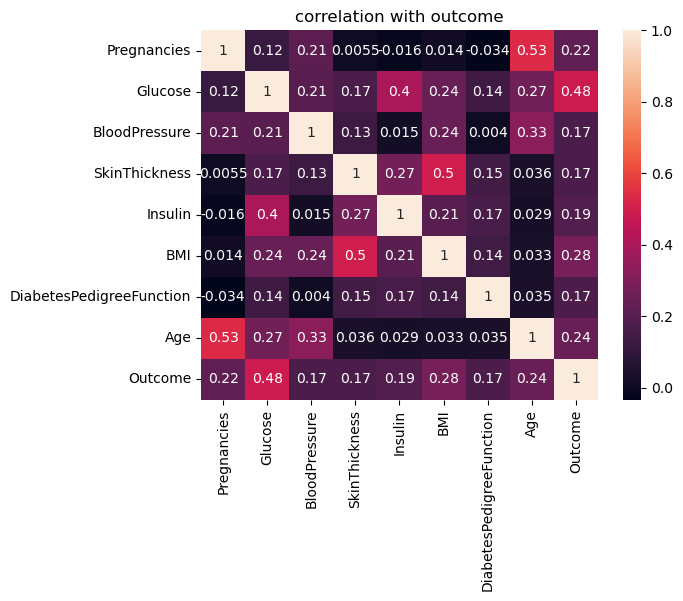

In [176]:
# plotting the correlation matrix graph
sns.heatmap(df.corr(),annot=True)
plt.title("correlation with outcome")
plt.show()

#### from the correlation heatmap there is a high correlation between outcome and( pregnancies , glucose, bmi, age, insuline) .we can select these features to accept input from the user and predict the outcome.

### Data splitting

In [177]:
x=df.drop(columns=['Outcome'])
y=df['Outcome']

In [178]:
x.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148.0,72.0,35.000000,74.615681,33.6,0.627,50
1,1,85.0,66.0,29.000000,74.615681,26.6,0.351,31
2,8,183.0,64.0,20.763496,74.615681,23.3,0.672,32
3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21
4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33


In [179]:
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

### Feature scaling

In [180]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x)
standardized_data = scaler.transform(x)

### Train Test split

In [181]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)

In [182]:
x_train.shape,y_train.shape

((622, 8), (622,))

In [183]:
x_test.shape,y_test.shape

((156, 8), (156,))

### Feature selection

In [184]:
from sklearn.feature_selection import SelectKBest,f_classif
selector=SelectKBest(score_func=f_classif,k=5)
x_selected=selector.fit_transform(x_train,y_train)
selected_indices=selector.get_support(indices=True)
selected_features=x_train.columns[selected_indices]
print("selected features: ")
print(selected_features)


selected features: 
Index(['Pregnancies', 'Glucose', 'Insulin', 'BMI', 'Age'], dtype='object')


### Model training & evaluation

#### 1.KNeighbors classifier

In [185]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
k=3
knn=KNeighborsClassifier(n_neighbors=k)
knn.fit(x_train,y_train)
y_pred1=knn.predict(x_test)
print(accuracy_score(y_test,y_pred1))
print(classification_report(y_test,y_pred1))

0.7435897435897436
              precision    recall  f1-score   support

           0       0.78      0.84      0.81       101
           1       0.66      0.56      0.61        55

    accuracy                           0.74       156
   macro avg       0.72      0.70      0.71       156
weighted avg       0.74      0.74      0.74       156



#### 2.Decision tree classifier

In [186]:
from sklearn.tree import DecisionTreeClassifier
decision_tree=DecisionTreeClassifier()
decision_tree.fit(x_train,y_train)
y_pred2=decision_tree.predict(x_test)
print(accuracy_score(y_test,y_pred2))
print(classification_report(y_test,y_pred2))

0.6538461538461539
              precision    recall  f1-score   support

           0       0.73      0.73      0.73       101
           1       0.51      0.51      0.51        55

    accuracy                           0.65       156
   macro avg       0.62      0.62      0.62       156
weighted avg       0.65      0.65      0.65       156



#### 3.Random forest classifier

In [187]:
from sklearn.ensemble import RandomForestClassifier
random_forest=RandomForestClassifier(n_estimators=100,random_state=1)
random_forest.fit(x_train,y_train)
y_pred3=random_forest.predict(x_test)
print(accuracy_score(y_test,y_pred3))
print(classification_report(y_test,y_pred3))

0.7884615384615384
              precision    recall  f1-score   support

           0       0.81      0.87      0.84       101
           1       0.73      0.64      0.68        55

    accuracy                           0.79       156
   macro avg       0.77      0.75      0.76       156
weighted avg       0.78      0.79      0.78       156



#### 4.Gaussian Naive Bayes 

In [188]:
from sklearn.naive_bayes import GaussianNB
naive_bayes=GaussianNB()
naive_bayes.fit(x_train,y_train)
y_pred4=naive_bayes.predict(x_test)
print(accuracy_score(y_test,y_pred4))
print(classification_report(y_test,y_pred4))
    

0.7564102564102564
              precision    recall  f1-score   support

           0       0.79      0.84      0.82       101
           1       0.67      0.60      0.63        55

    accuracy                           0.76       156
   macro avg       0.73      0.72      0.73       156
weighted avg       0.75      0.76      0.75       156



#### 5.Logistic Regression

In [189]:
from sklearn.linear_model import LogisticRegression
logistic_regression= LogisticRegression(solver='liblinear',multi_class='ovr')
logistic_regression.fit(x_train,y_train)
y_pred5=logistic_regression.predict(x_test)
print(accuracy_score(y_test,y_pred5))
print(classification_report(y_test,y_pred5))

0.7692307692307693
              precision    recall  f1-score   support

           0       0.78      0.90      0.83       101
           1       0.74      0.53      0.62        55

    accuracy                           0.77       156
   macro avg       0.76      0.71      0.73       156
weighted avg       0.77      0.77      0.76       156



In [190]:
# COMPARISON OF MODELS WITH ACCURACY
performance_summary = pd.DataFrame({
    'Model':['knn','decision_tree','random_forest','naive_byes','logistic_regression',],
    'accuracy':[accuracy_score(y_test,y_pred1),
               accuracy_score (y_test,y_pred2),
               accuracy_score (y_test,y_pred3), 
               accuracy_score (y_test,y_pred4), 
               accuracy_score (y_test,y_pred5)]
              
})
          
performance_summary

,Model,accuracy
0,knn,0.743590
1,decision_tree,0.653846
2,random_forest,0.788462
3,naive_byes,0.756410
4,logistic_regression,0.769231


### Result
#### Among the models tested , the Random Forest model performed the best with an accuracy of 0.782 

### Saving model - Random Forest

In [201]:
import pickle
save_model=pickle.dumps(random_forest)
random_forest_from_pickle=pickle.loads(save_model)
random_forest_from_pickle.predict(x_test)

array([1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1], dtype=int64)

### Conclusion

   machine learning offers powerful techniques for disease prediction in healthcare by analyzing various health indicators and lifestyle factors. This comprehensive analysis explored several machine learning algorithms, such as random forests, decision trees,naive byes,knn for building effective diabetes prediction models.

   The random forest model emerged as the top performer, achieving an accuracy of 0.78 on the test dataset. We also gained valuable insights into feature importance, with glucose levels being the most influential predictor of diabetes in this dataset. Visualizing the data distributions, correlations, and outliers further enhanced our understanding.

   While machine learning excels at diabetes prediction, we discussed alternative methods like  naive Bayes, and k-nearest neighbors, each with strengths and limitations. Selecting the right approach depends on factors like dataset size, model interpretability needs, and the complexity of the underlying relationships.
Machine learning offers powerful techniques for disease prediction in healthcare by analyzing various health indicators and lifestyle factors. This comprehensive analysis explored several machine learning algorithms, such as random forests, decision trees, knn, and naive bayes, for building effective diabetes prediction models.

   The random forest model emerged as the top performer, achieving an accuracy of 0.78 on the test dataset. We also gained valuable insights into feature importance, with glucose levels being the most influential predictor of diabetes in this dataset. Visualizing the data distributions, correlations, and outliers further enhanced our understanding.

   Looking ahead, continued research integrating more extensive and more diverse patient datasets and exploring advanced neural network architectures holds immense potential for improving diabetes prediction accuracy. Additionally, deploying these predictive models in clinical settings can facilitate early intervention, risk stratification, and tailored treatment plans, ultimately improving outcomes for individuals at risk of developing diabetes.
